In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
data1 = pd.read_csv("All_Data_ASDA.csv")


C:\Users\Dell\AppData\Local\Temp\ipykernel_5740\606857094.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("All_Data_ASDA.csv")


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [5]:
data1.head(5)


,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,ASDA,4.75,19.8,kg,Tassimo Cadbury Hot Chocolate Pods x 8,20240413,drinks,False
1,ASDA,2.00,26.7,kg,Taylors of Harrogate Hot Lava Java Coffee Bags,20240413,drinks,False
2,ASDA,5.00,20.8,kg,Tassimo Limited Edition Cadbury Orange Hot Cho...,20240413,drinks,False
3,ASDA,3.50,15.4,kg,ASDA Extra Special Brazilian Ground Coffee,20240413,drinks,True
4,ASDA,3.50,15.4,kg,ASDA Extra Special Espresso Coffee Beans,20240413,drinks,True


In [7]:
# Convert date column to datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')

# Convert own_brand to boolean
data1['own_brand'] = data1['own_brand'].astype(bool)

In [12]:
# Average prices for own-brand vs non-own-brand products
avg_price_by_brand = data1.groupby('own_brand')['prices_(£)'].mean()
avg_price_per_unit_by_brand = data1.groupby('own_brand')['prices_unit_(£)'].mean()

print("\nAverage price by brand (own-brand vs non-own-brand):")
print(avg_price_by_brand)

print("\nAverage price per unit by brand (own-brand vs non-own-brand):")
print(avg_price_per_unit_by_brand)



Average price by brand (own-brand vs non-own-brand):
own_brand
False    6.312027
True     4.405998
Name: prices_(£), dtype: float64

Average price per unit by brand (own-brand vs non-own-brand):
own_brand
False    100.040811
True      11.495466
Name: prices_unit_(£), dtype: float64


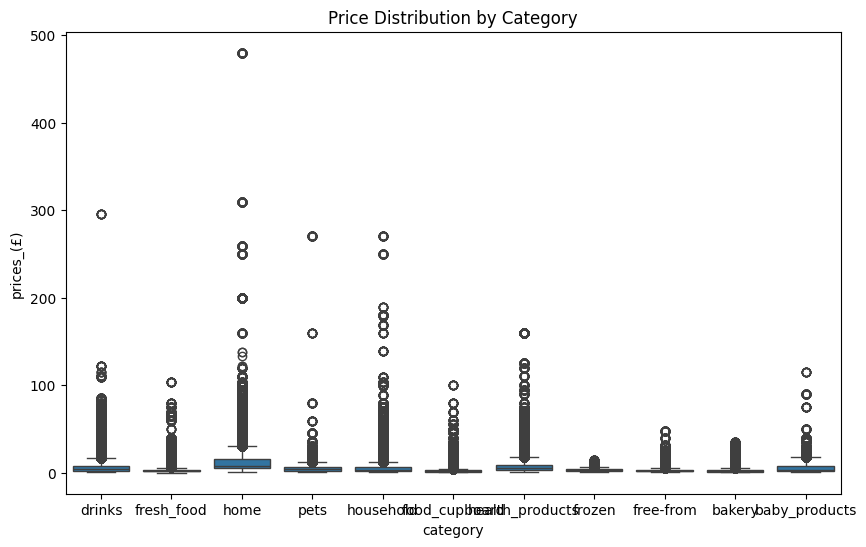

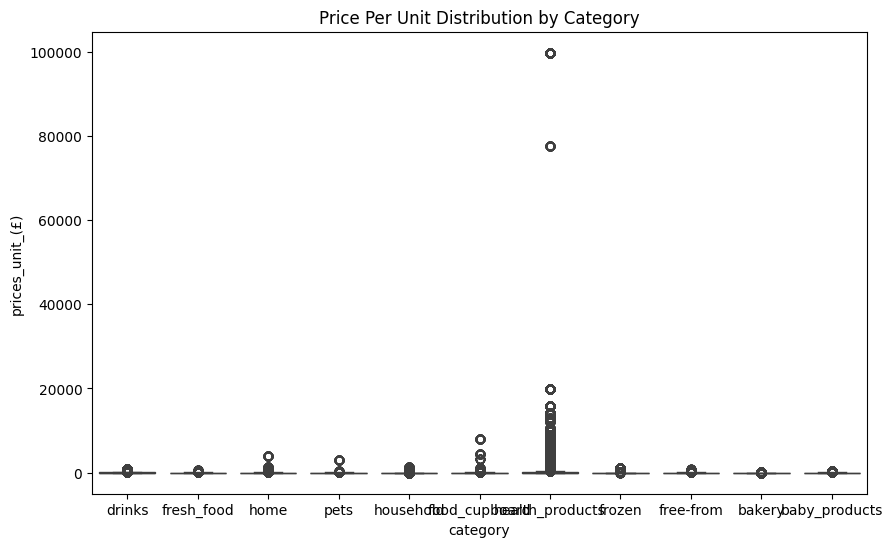

In [14]:
# Price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='category', y='prices_(£)')
plt.title('Price Distribution by Category')
plt.show()

# Price per unit distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='category', y='prices_unit_(£)')
plt.title('Price Per Unit Distribution by Category')
plt.show()


In [15]:
# Top 5 most expensive products by price
top_5_expensive = data1.nlargest(5, 'prices_(£)')
print("\nTop 5 most expensive products by price:")
print(top_5_expensive[['names', 'prices_(£)']])

# Top 5 least expensive products by price
top_5_cheap = data1.nsmallest(5, 'prices_(£)')
print("\nTop 5 least expensive products by price:")
print(top_5_cheap[['names', 'prices_(£)']])

# Top 5 products by price per unit
top_5_expensive_per_unit = data1.nlargest(5, 'prices_unit_(£)')
print("\nTop 5 most expensive products by price per unit:")
print(top_5_expensive_per_unit[['names', 'prices_unit_(£)']])



Top 5 most expensive products by price:
                          names  prices_(£)
489179  Xbox Series X Microsoft      479.99
515632    Xbox Series X Console      479.99
551106    Xbox Series X Console      479.99
554780    Xbox Series X Console      479.99
593941    Xbox Series X Console      479.99

Top 5 least expensive products by price:
                   names  prices_(£)
925122   ASDA Loose Okra        0.05
955399   ASDA Loose Okra        0.05
984820   ASDA Loose Okra        0.05
1015544  ASDA Loose Okra        0.05
1022132  ASDA Loose Okra        0.05

Top 5 most expensive products by price per unit:
                                      names  prices_unit_(£)
6636        Max Factor Brow Shaper 20 Brown          99778.0
6638   Max Factor Brow Shaper 30 Deep Brown          99778.0
6663       Max Factor Brow Shaper 10 Blonde          99778.0
51986  Max Factor Brow Shaper 30 Deep Brown          99778.0
51995       Max Factor Brow Shaper 20 Brown          99778.0


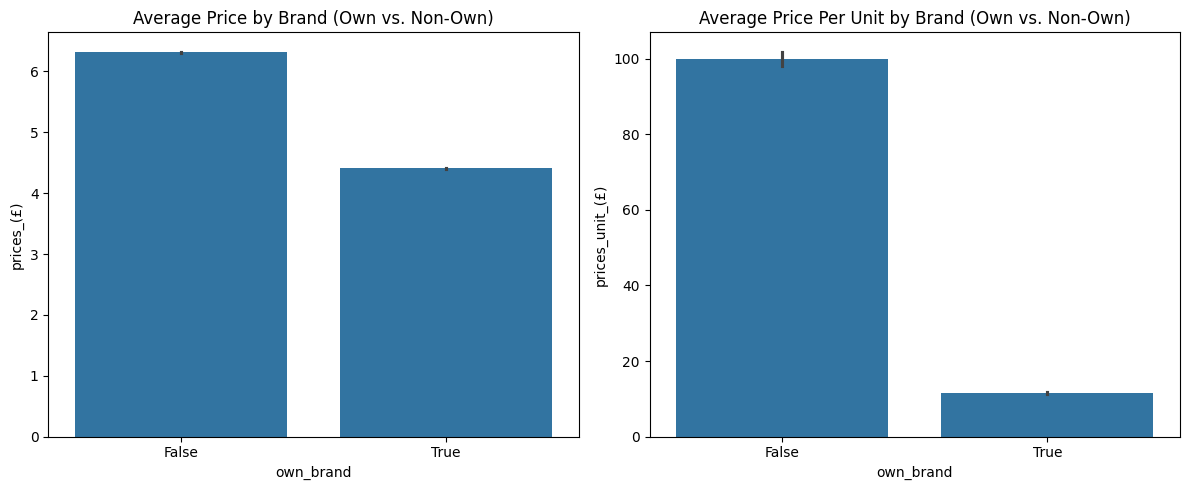

In [16]:
# Visualize average price and price per unit by brand
plt.figure(figsize=(12, 5))

# Average Price by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=data1, x='own_brand', y='prices_(£)')
plt.title('Average Price by Brand (Own vs. Non-Own)')

# Average Price Per Unit by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=data1, x='own_brand', y='prices_unit_(£)')
plt.title('Average Price Per Unit by Brand (Own vs. Non-Own)')

plt.tight_layout()
plt.show()


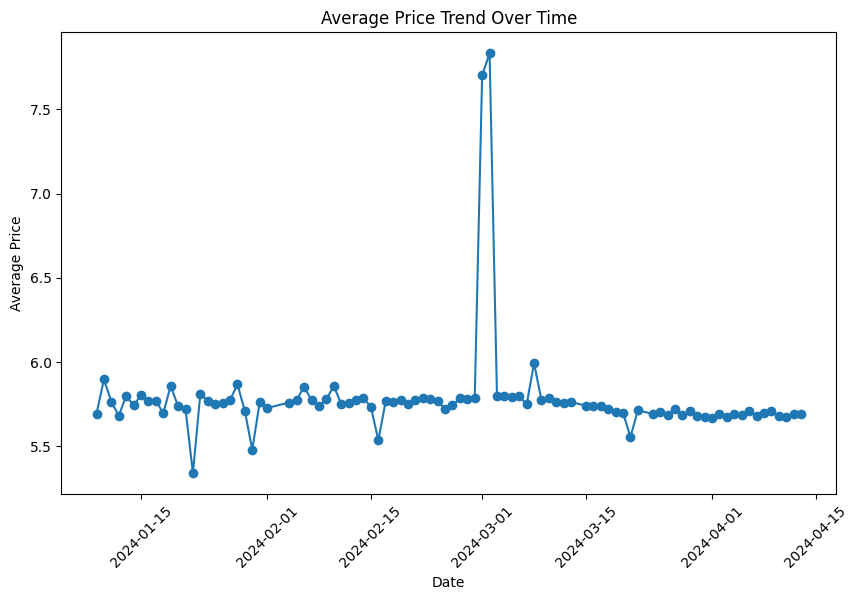

In [18]:
# Average price trend over time (if there are multiple dates)
if data1['date'].nunique() > 1:
    data1_date_trend = data1.groupby('date')['prices_(£)'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(data1_date_trend['date'], data1_date_trend['prices_(£)'], marker='o')
    plt.title('Average Price Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
def price_range_by_category(data1):
    price_range = data1.groupby('category')['prices_(£)'].agg(lambda x: x.max() - x.min())
    print("\nPrice Range by Category:")
    print(price_range)


In [20]:
def highest_avg_price_by_category(data1):
    avg_price = data1.groupby('category')['prices_(£)'].mean().sort_values(ascending=False)
    print("\nCategories with Highest Average Prices:")
    print(avg_price)


In [25]:
def brand_comparison_count_and_avg_price(data1):
    brand_comparison = data1.groupby('own_brand').agg(
        count=('prices_(£)', 'size'),
        avg_price=('prices_(£)', 'mean')
    )
    print("\nComparison of Own-brand vs. Non-own-brand (Count and Average Price):")
    print(brand_comparison)


In [26]:
def top_3_frequent_categories(data1):
    top_categories = data1['category'].value_counts().nlargest(3)
    print("\nTop 3 Most Frequent Categories:")
    print(top_categories)


In [27]:
price_range_by_category(data1)
highest_avg_price_by_category(data1)
brand_comparison_count_and_avg_price(data1)
top_3_frequent_categories(data1)



Price Range by Category:
category
baby_products      114.70
bakery              34.55
drinks             294.72
food_cupboard       99.80
free-from           46.60
fresh_food         103.95
frozen              13.54
health_products    159.70
home               479.64
household          269.69
pets               269.50
Name: prices_(£), dtype: float64

Categories with Highest Average Prices:
category
home               12.396608
health_products     7.152994
drinks              6.836530
household           6.366411
baby_products       5.614878
pets                5.348657
bakery              3.255231
fresh_food          3.017765
frozen              2.943701
free-from           2.680015
food_cupboard       2.136959
Name: prices_(£), dtype: float64

Comparison of Own-brand vs. Non-own-brand (Count and Average Price):
             count  avg_price
own_brand                    
False      1741841   6.312027
True        714573   4.405998

Top 3 Most Frequent Categories:
category
food_cupboar

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
data1['own_brand'] = data1['own_brand'].astype(int)  # Encode own_brand as 0 or 1
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')  # Convert date if needed

In [30]:
# Define features (X) and target (y)
X = data1[['category', 'supermarket', 'own_brand']]  # You can add more relevant features
y = data1['prices_unit_(£)']  # Target variable

In [31]:
# Encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['own_brand']),
        ('cat', OneHotEncoder(drop='first'), ['category', 'supermarket'])
    ])

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define models
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))])
}

In [36]:
missing_y = data1['prices_unit_(£)'].isna().sum()
print(f"Missing values in 'prices_unit_': {missing_y}")

Missing values in 'prices_unit_': 199


In [38]:
data1 = data1.dropna(subset=['prices_unit_(£)'])

In [41]:
X = data1[['category', 'supermarket', 'own_brand']]
y = data1['prices_unit_(£)']

In [43]:
data1['prices_unit_(£)'] = data1['prices_unit_(£)'].fillna(data1['prices_unit_(£)'].mean())

C:\Users\Dell\AppData\Local\Temp\ipykernel_5740\1783186697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['prices_unit_(£)'] = data1['prices_unit_(£)'].fillna(data1['prices_unit_(£)'].mean())


In [45]:
# Check for missing values in 'prices_unit_' column before dropping/filling
print(f"Missing values in 'prices_unit_(£)' before cleaning: {data1['prices_unit_(£)'].isna().sum()}")

# Drop rows where 'prices_unit_' is NaN
data1 = data1.dropna(subset=['prices_unit_(£)'])

# Confirm that there are no missing values in 'prices_unit_'
print(f"Missing values in 'prices_unit_(£)' after cleaning: {data1['prices_unit_(£)'].isna().sum()}")


Missing values in 'prices_unit_(£)' before cleaning: 0
Missing values in 'prices_unit_(£)' after cleaning: 0


In [48]:
# Redefine X and y after cleaning
X = data1[['category', 'supermarket', 'own_brand']]
y = data1['prices_unit_(£)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models as before
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                          MAE           MSE  R^2 Score
Linear Regression  111.055335  1.320220e+06   0.013679
Random Forest      100.961351  1.317683e+06   0.015575
Gradient Boosting  100.955989  1.317680e+06   0.015577


In [50]:
# Dictionary to store results and predictions
results = {}
predictions = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2 Score': r2
    }
    
    # Store predictions
    predictions[name] = y_pred

# Display model performance comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Show predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,  # Actual test values
    'Linear Regression Prediction': predictions['Linear Regression'],
    'Random Forest Prediction': predictions['Random Forest'],
    'Gradient Boosting Prediction': predictions['Gradient Boosting']
})

# Display the first few predictions for comparison
print("\nSample Predictions Comparison:")
print(predictions_df.head(10))  # Display first 10 predictions for each model



Model Performance Comparison:
                          MAE           MSE  R^2 Score
Linear Regression  111.055335  1.320220e+06   0.013679
Random Forest      100.961351  1.317683e+06   0.015575
Gradient Boosting  100.955989  1.317680e+06   0.015577

Sample Predictions Comparison:
         Actual  Linear Regression Prediction  Random Forest Prediction  \
152655     16.7                     26.395053                 15.904527   
66324       9.5                    366.439384                408.100758   
852651      5.1                     35.915949                 10.671796   
1759780    19.2                     20.106957                 13.336792   
2302195    25.0                     34.906562                 27.302289   
1600991    13.5                     26.395053                 15.904527   
1558070   494.0                    366.439384                408.100758   
30338       2.5                    322.204236                 25.520059   
404280     14.0                     34.906

In [49]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                          MAE           MSE  R^2 Score
Linear Regression  111.055335  1.320220e+06   0.013679
Random Forest      100.961351  1.317683e+06   0.015575
Gradient Boosting  100.955989  1.317680e+06   0.015577


Metrics Overview
Mean Absolute Error (MAE): This measures the average magnitude of errors between the predicted values and the actual values, in the same unit as the target variable (prices_unit_ here). Lower values indicate better performance. In your results:

All models have MAE values around 100-111, meaning that, on average, the models' predictions are off by approximately 100 units of the target variable.
Mean Squared Error (MSE): This metric squares each error before averaging, making it sensitive to larger errors (outliers). Lower values also indicate better performance. Here:

The MSE values are around 1.32 million across all models, suggesting similar performance among them in terms of error magnitude.
R² Score (Coefficient of Determination): The R² score explains the proportion of variance in the target variable that is predictable from the features. An R² score of 1 means perfect prediction, while a score closer to 0 means the model barely explains any of the variance in the target variable. Here:

The R² scores are very low (around 0.01 - 0.015), meaning that the models are explaining only about 1-1.5% of the variance in the target variable.